# Plotting and Visualization
- 시각화(visualization)을 통해 outlier 발견, 데이터변형의 필요한지, 모델에 대한 아이디어 도출
- matplotlib: a plotting library for 2D and its numerical mathematics extension NumPy
- seaborn: Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
- 참고문헌
    - Python for Data Analysis (Ch.9), Wes Mckinney, O'Reily, 2nd Edi., 2017.
    - Matplotlib documentation, Release 2.0.2, 2017
    - https://matplotlib.org/users/pyplot_tutorial.html
    - https://datascienceschool.net/view-notebook/6e71dbff254542d9b0a054a7c98b34ec/

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
# magic 명령어: 일반적인 작업이나 ipython 시스템 동작을 제어
%matplotlib notebook

# 1. A Brief matplotlib API Primer

In [3]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


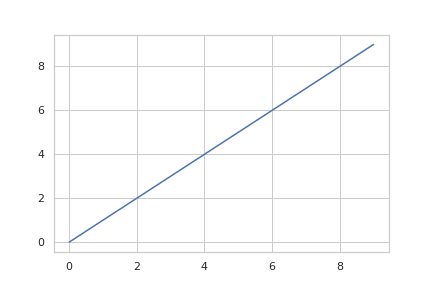

In [4]:
import numpy as np
data = np.arange(10)
data
plt.plot(data)

## 1.1 Figures and Subplots
- graph는 figure 객체 내에 존재

<IPython.core.display.Javascript object>


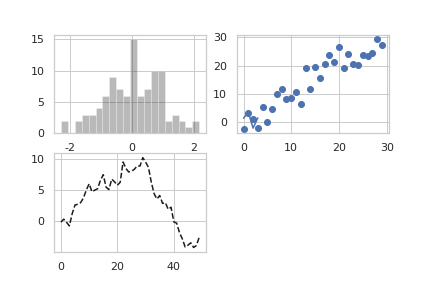

In [5]:
# 새로운 figure 객체 생성
fig = plt.figure()

In [6]:
# fig 객체는 2 x 2개의 subplot, 그중에서 첫번째(좌상단) subplot 선택
ax1 = fig.add_subplot(2, 2, 1)

In [7]:
ax2 = fig.add_subplot(2, 2, 2)

In [8]:
# 가장 최근의 figure와 subplot에 그린다.
plt.plot([1.5, 3.5, -2, 1.6])

In [9]:
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [10]:
# hist: histogram(bar chart), bins: 구간수, color: 색상, alpha: 투명도
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [11]:
# scatter: 2차원 데이터 즉, 두 개의 실수 데이터 집합의 상관관계 표시
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

In [12]:
plt.close('all')

- plt.subplots: creates a new figure with a grid of subplots and returns a NumPy array containing the created subplot objects
![표9-1](img/Table9-1.png)

<IPython.core.display.Javascript object>


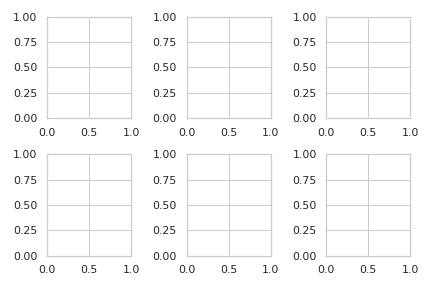

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3EEFA49A0>,
      dtype=object)

In [14]:
fig, axes = plt.subplots(2, 3)
plt.tight_layout()
axes

#### subplot 간 간격 조정
- subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
- wspace: 좌우 subplot간의 너비에 대한 비율 조절
- hspace: 위아래 subplot 간의 높이에 대한 비율 조정

<IPython.core.display.Javascript object>


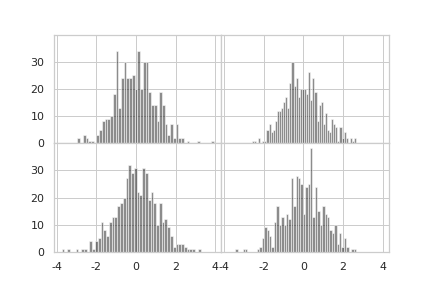

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

## 1.2 Colors, Markers, and Line Styles

- ax.plot(x, y, 'g--') : 녹색 점선
- ax.plot(x, y, linestyle='--', color='g')

<IPython.core.display.Javascript object>


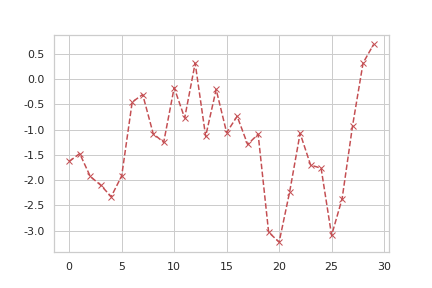

<IPython.core.display.Javascript object>


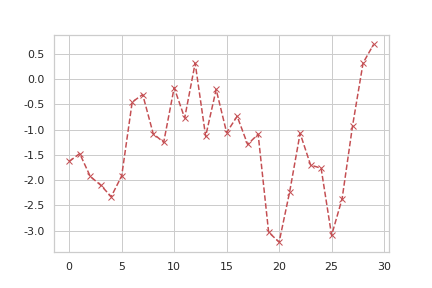

In [16]:
plt.figure()

In [17]:
# marker
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'rx--')

- plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [18]:
plt.close('all')

<IPython.core.display.Javascript object>


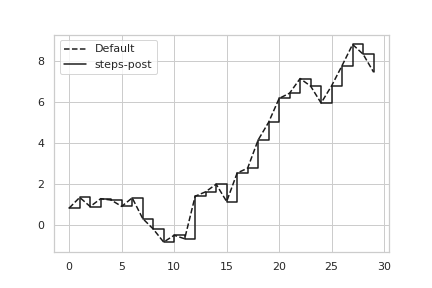

In [19]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 1.3 Ticks, Labels, and Legends
- xlim: 범위
- xticks: 눈금 위치
- xticklabels: 눈금 이름 지정

### 1) Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


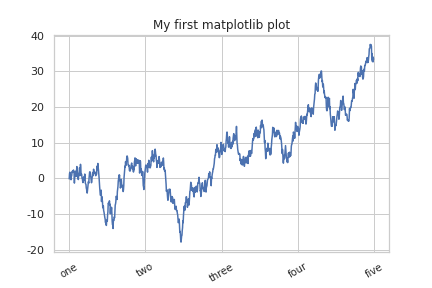

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [21]:
plt.xlim()

(-49.95, 1048.95)

In [22]:
# 눈금 위치 지정
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# 눈금 이름/형태/폰트
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [23]:
# 그림 title
ax.set_title('My first matplotlib plot')

# X 축 이름
ax.set_xlabel('Stages')

Text(0.5, 0.6522459621556145, 'Stages')

- set method
![set_method](img/P263_set_method.PNG)

### 2) Adding legends
- plot 함수에 label 인자 넣고
- legend() 실행

<IPython.core.display.Javascript object>


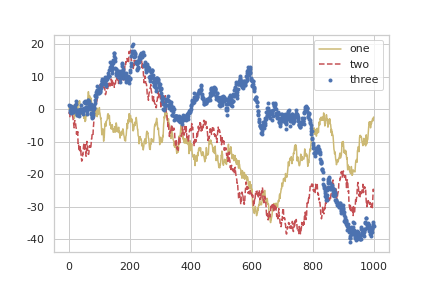

In [24]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'y', label='one')
ax.plot(randn(1000).cumsum(), 'r--', label='two')
ax.plot(randn(1000).cumsum(), 'b.', label='three')

In [25]:
ax.legend(loc='best')

## 1.4 Annotations and Drawing on a Subplot
### 1) 주석 추가하기
- text: 그림에 추가할 주석, 주석 위치(x,y) 좌표
- arrow: 그림에 추가할 화살표
- annotate: 

<IPython.core.display.Javascript object>


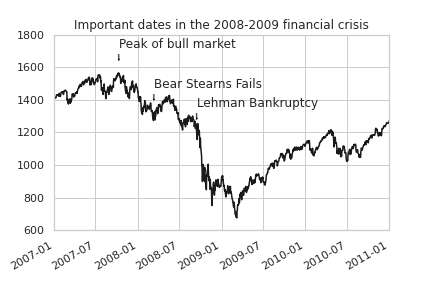

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [26]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('../examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

### 2) 도형그리기 
- patches 객체
- add_patch(shape) 함수

<IPython.core.display.Javascript object>


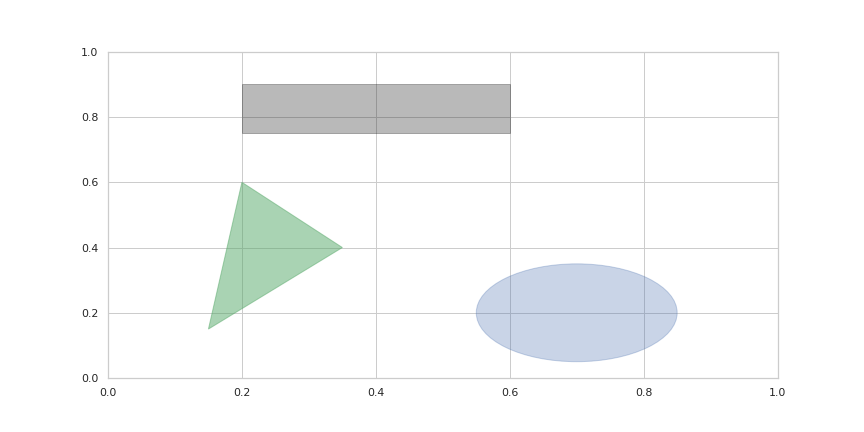

In [27]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)   #(x,y) 좌표, x 폭, y 높이
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)   # 원 중심 (x, y), 반지름
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], # 다형의 각 점
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 1.5 Saving Plots to File
- plt.savefig('figpath.svg')  # 파일이름의 확장자에 따라 파일 종류 결정(figpath.pdf => pdf 파일)

![표9-2](img/Table9-2.PNG)

- 예) plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [28]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

## 1.6 matplotlib Configuration
- 도표 크기, subplot 간격, 색상, 글자크기, 격자 스타일 등을 전역 인자를 통해 설정
- rc method
- 예1) plt.rc('figure', figsize=(10, 10))
- 예2) ![rc설정](img/P268_rc_method.PNG)

# 2. Plotting with pandas and seaborn

## 2.1 Line Plots
- Series, DataFrame의 plot method를 이용하여 다양한 그래프 생성
- index: x 축

In [29]:
plt.close('all')

0    -1.031533
10   -0.034588
20    1.226237
30    1.844213
40    2.451552
50    3.415352
60    3.506361
70    3.175326
80    3.279649
90    4.274876
dtype: float64


<IPython.core.display.Javascript object>


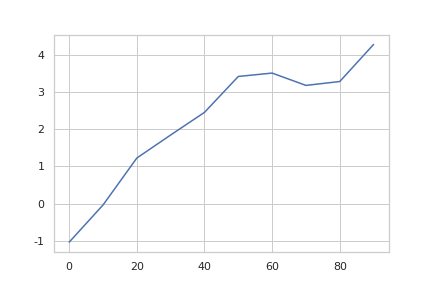

In [30]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
print(s)
s.plot()

![표9-3](img/Table9-3.PNG)

- DataFrame의 plot
- 각 column별로 선 그래프를 그리고, 범례는 자동 생성

<IPython.core.display.Javascript object>


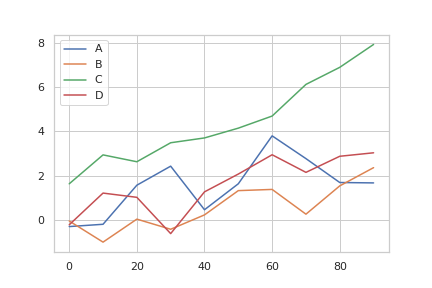

In [31]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

![표9-4](img/Table9-4.PNG)

## 2.2 Bar Plots
### 1) Series의 막대그래프
- plot(kind='bar') or plot.bar()
- plot(kind='barh') or plot.barh()

<IPython.core.display.Javascript object>


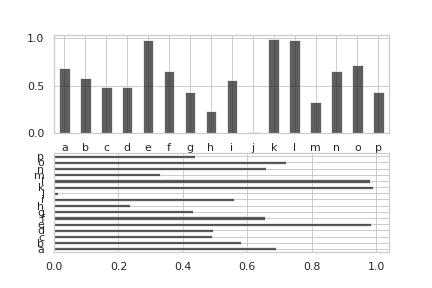

In [32]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7, rot=0)
# data.plot.bar(ax=axes[0], color='k', alpha=0.7, rot=0)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)
# data.plot(kind= 'barh' ax=axes[1], color='k', alpha=0.7)

### 2) DataFrame의 막대그래프
- DataFrame은 각 row의 값을 함께 묶어서 하나의 그룹으로 막대그래프 
- name 이름이 범례의 제목

In [33]:
np.random.seed(12348)

In [34]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
print(df)

Genus         A         B         C         D
one    0.370670  0.602792  0.229159  0.486744
two    0.420082  0.571653  0.049024  0.880592
three  0.814568  0.277160  0.880316  0.431326
four   0.374020  0.899420  0.460304  0.100843
five   0.433270  0.125107  0.494675  0.961825
six    0.601648  0.478576  0.205690  0.560547


<IPython.core.display.Javascript object>


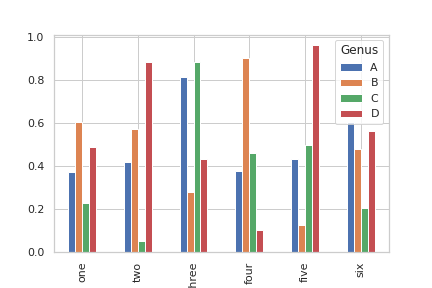

In [35]:
df.plot.bar()

### 3) 쌓인 막대그래프
- stacked=True option

<IPython.core.display.Javascript object>


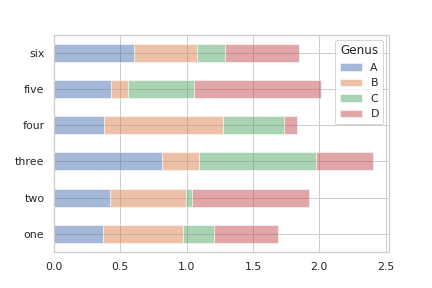

In [36]:
df.plot.barh(stacked=True, alpha=0.5)

In [37]:
plt.close('all')

In [38]:
tips = pd.read_csv('../examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [39]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [40]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [41]:
# 각 row의 합이 1이 되게 Normalize
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


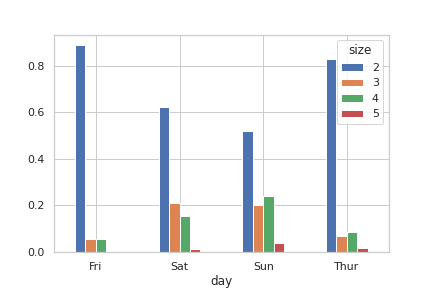

In [42]:
party_pcts.plot.bar(rot=0)

In [43]:
plt.close('all')

In [44]:
import seaborn as sns
# tip을 제외한 파티비용 대비 tip 비율
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


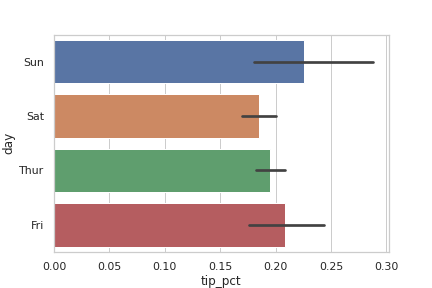

In [45]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [46]:
plt.close('all')

<IPython.core.display.Javascript object>


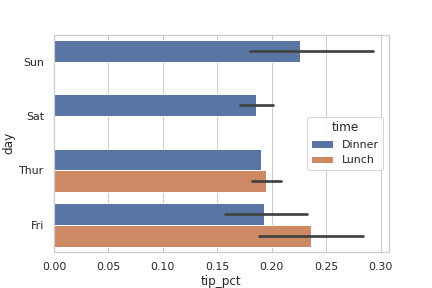

In [47]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [48]:
plt.close('all')

In [49]:
sns.set(style="whitegrid")

## 2.3 Histograms and Density Plots

### 1) Histogram
- a discretized display of value frequency
- plot.hist method

<IPython.core.display.Javascript object>


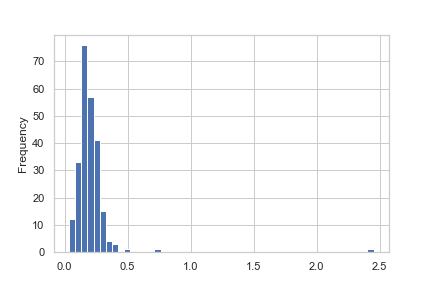

<IPython.core.display.Javascript object>


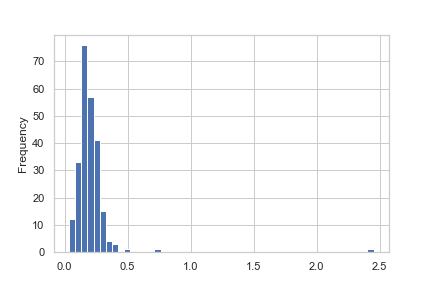

In [50]:
plt.figure()

In [51]:
tips['tip_pct'].plot.hist(bins=50)

#### density plot 
- an estimate of a continuous probability distribution
- Kernel Density Estimate Graph
- plot.kde method

<IPython.core.display.Javascript object>


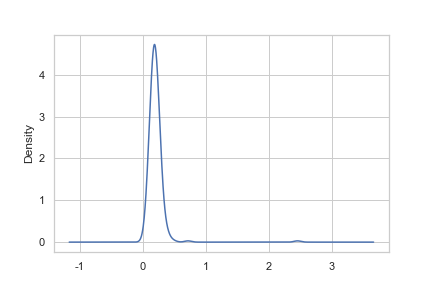

<IPython.core.display.Javascript object>


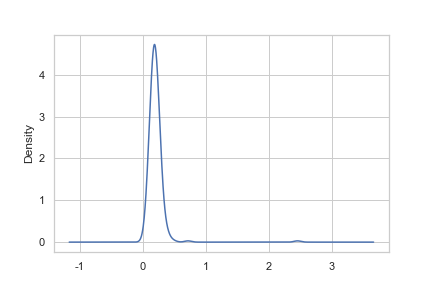

In [52]:
plt.figure()

In [53]:
# kernel density estimate graph
# tips['tip_pct'].plot(kind='kde') 도 동일
tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


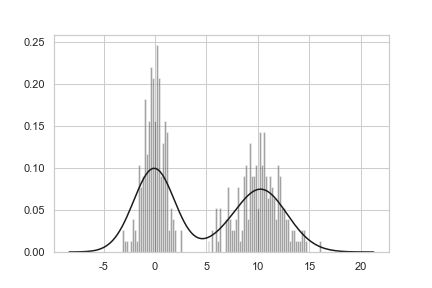

<IPython.core.display.Javascript object>


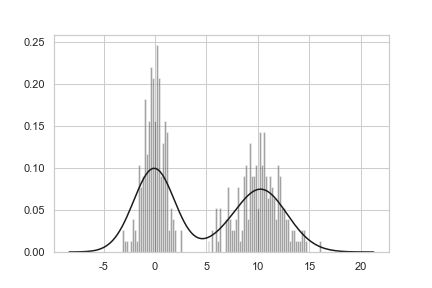

In [54]:
plt.figure()

In [55]:
comp1 = np.random.normal(0, 1, size=200)   # N(0,1): 평균 0, 표준편차 1
comp2 = np.random.normal(10, 2, size=200)  # N(10,2)
values = pd.Series(np.concatenate([comp1, comp2]))
values

0       0.203887
1      -2.213737
2       0.315042
3      -0.137200
4       0.036238
         ...    
395    10.636197
396     9.259458
397    10.182617
398    10.686063
399    10.864287
Length: 400, dtype: float64

In [56]:
sns.distplot(values, bins=100, color='k')

## 2.4 Scatter or Point Plots
- 두 개의 1차원 Series Data 간의 관계 분석
- plt.scatter method

In [57]:
macro = pd.read_csv('../examples/macrodata.csv')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [58]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[: 5]

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


<IPython.core.display.Javascript object>


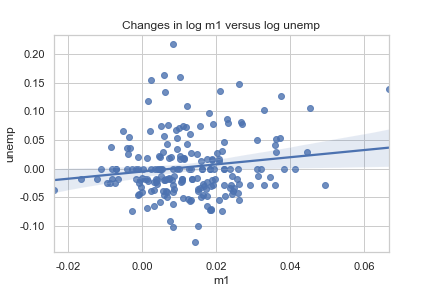

<IPython.core.display.Javascript object>


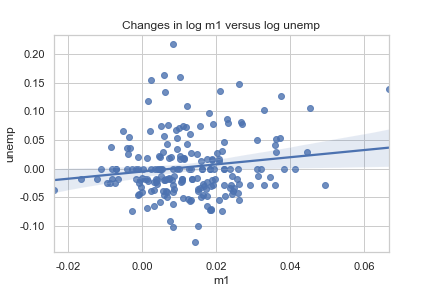

In [59]:
plt.figure()

In [60]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


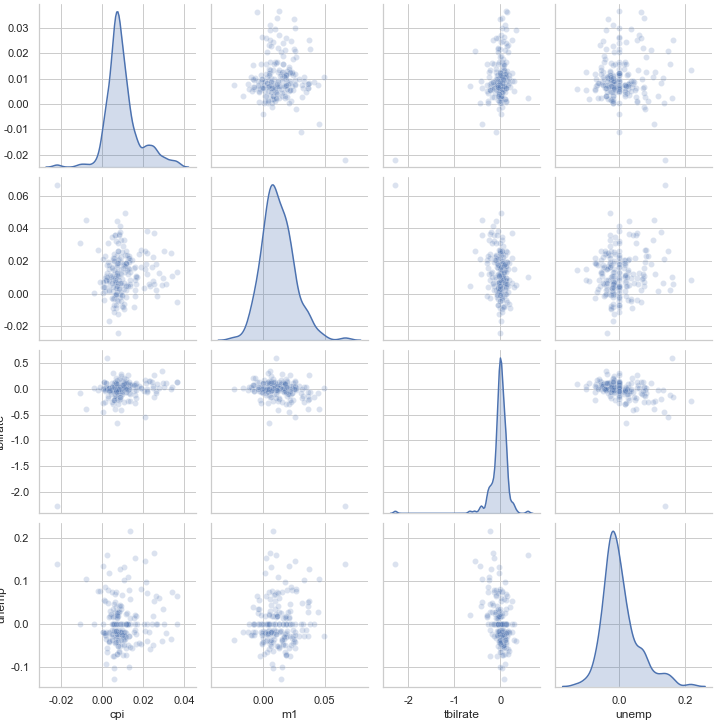

In [61]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

<IPython.core.display.Javascript object>


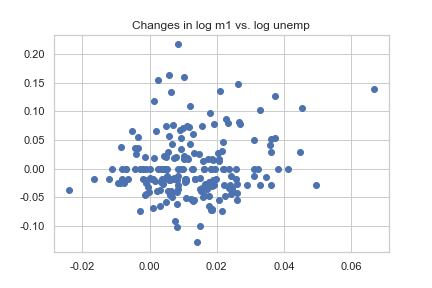

Text(0.5, 1.0, 'Changes in log m1 vs. log unemp')

In [62]:
plt.figure()
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

In [63]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

## 2.5 Facet Grids and Categorical Data
- seaborn factorplot fumction simplifies making many kinds of faceted plots

<IPython.core.display.Javascript object>


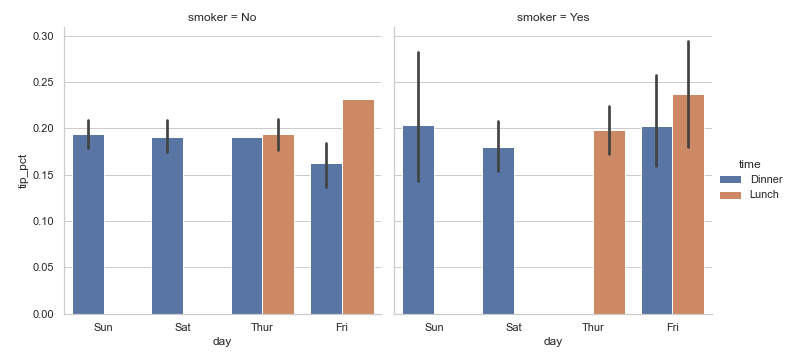

In [64]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


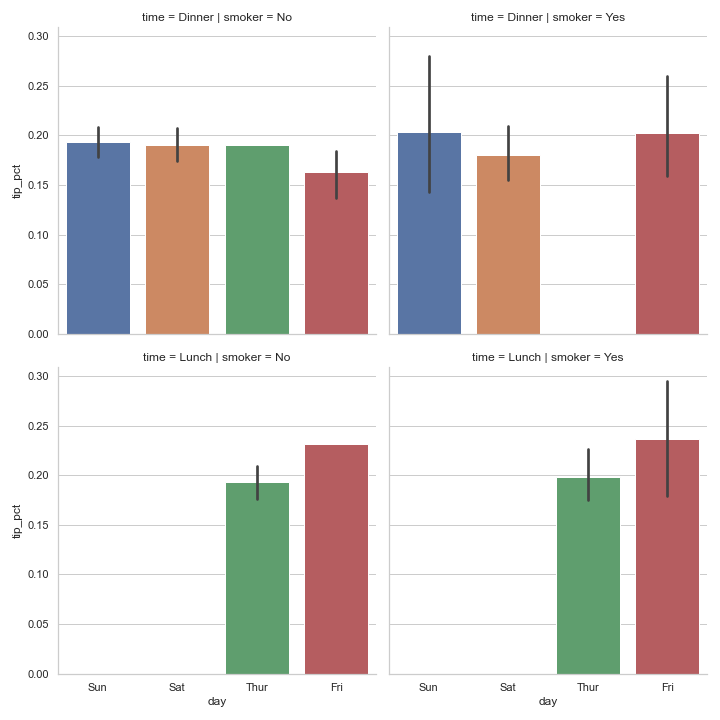

In [65]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


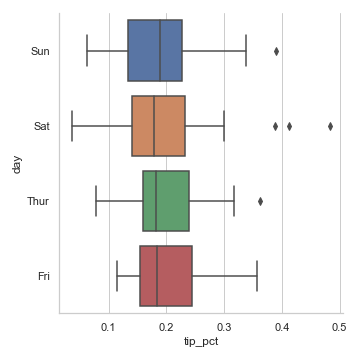

In [66]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

# 3. Plotting Maps: Visualizing Haiti Earthquake Crisis data

In [67]:
data = pd.read_csv('../examples/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Serial          3593 non-null   int64  
 1   INCIDENT TITLE  3593 non-null   object 
 2   INCIDENT DATE   3593 non-null   object 
 3   LOCATION        3592 non-null   object 
 4   DESCRIPTION     3593 non-null   object 
 5   CATEGORY        3587 non-null   object 
 6   LATITUDE        3593 non-null   float64
 7   LONGITUDE       3593 non-null   float64
 8   APPROVED        3593 non-null   object 
 9   VERIFIED        3593 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [68]:
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [69]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [70]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [71]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [72]:
# 잘못된 위치정보와 category 제거
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]
data.head()

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [73]:
# 여러 개의 category를 가진 것은 분리
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [74]:
# get_english function 테스트
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [75]:
all_cats = get_all_categories(data.CATEGORY)
all_cats

['1. Urgences | Emergency',
 '1a. Highly vulnerable',
 '1b. Urgence medicale | Medical Emergency',
 '1c. Personnes prises au piege | People trapped',
 '1d. Incendie | Fire',
 '2. Urgences logistiques | Vital Lines',
 "2a. Penurie d'aliments | Food Shortage",
 "2b. Penurie d'eau | Water shortage",
 '2c. Eau contaminee | Contaminated water',
 '2c. Probleme de securite | Security Concern',
 '2d. Refuge | Shelter needed',
 '2e. Penurie de carburant | Fuel shortage',
 '2f. Sans courant | Power Outage',
 '3. Public Health',
 '3a. Infectious human disease',
 '3b. Chronic care needs',
 '3c. Besoins en materiels et medicaments | Medical equipment and supply needs',
 "3d. OBGYN/Women's Health",
 '3e. Psychiatric need',
 '4. Menaces | Security Threats',
 '4a. Pillage | Looting',
 '4c. Group violence',
 '4e. Assainissement eau et hygiene | Water sanitation and hygiene promotion',
 '5. Infrastructure Damage',
 '5a. Structure effondres | Collapsed structure',
 '5b. Structures a risque | Unstable Str

In [76]:
# category code와 category 이믈을 dictionary
english_mapping = dict(get_english(x) for x in all_cats)

In [77]:
english_mapping['2a']

'Food Shortage'

In [78]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = pd.DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [82]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       3569 non-null   float64
 1   1a      3569 non-null   float64
 2   1b      3569 non-null   float64
 3   1c      3569 non-null   float64
 4   1d      3569 non-null   float64
 5   2       3569 non-null   float64
dtypes: float64(6)
memory usage: 195.2 KB


In [83]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.iloc[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [85]:
data.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Empty DataFrame

### Basemap 설치
- Basemap
    - python으로 지도 위에 2차원 데이터 도표를 그릴 수 있는 package
    - 여러가지 지도 투영법을 지원하며 위도 경도 좌표를 2차원 평면 matplotlib의 좌표로 변환
- http://www.lfd.uci.edu/~gohlke/pythonlibs/
- download basemap‑1.2.0‑cp36‑cp36m‑win_amd64.whl
- python -m pip install basemap‑1.2.0‑cp36‑cp36m‑win_amd64.whl

In [86]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

<IPython.core.display.Javascript object>


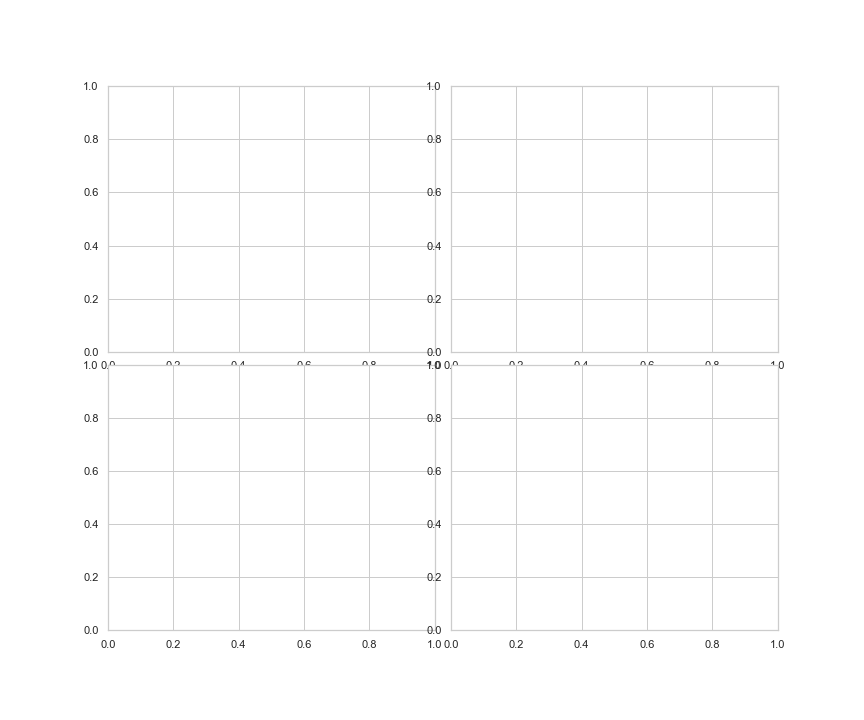

NameError: name 'basic_haiti_map' is not defined

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

- basemap can overlap additional map data which comes from what are called shapefiles

In [88]:
shapefile_path = '../examples/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

NameError: name 'm' is not defined

# 4. Other Python Visualization Tools
- Bokeh: an interactive visualization library that targets modern web browsers for presentation.
- Plotly: Python과 Django 프레임워크를 사용하여 제작되었으며 프론트 엔드는 JavaScript와 시각화 라이브러리 D3.js, HTML 및 CSS를 사용